# **Aircraft Risk Analysis for Business Expansion**

## **Introduction**
As part of our company’s strategic diversification, we are exploring entry into the aviation industry, with a focus on acquiring and operating aircraft for commercial and private enterprises. However, a key challenge in this endeavor is understanding the risks associated with different aircraft models. 

This analysis aims to identify the **lowest-risk aircraft** based on available data, helping the leadership team make informed decisions about their initial purchases. 

## **Objectives**
- Assess potential risks associated with different aircraft models.
- Identify key factors contributing to aircraft risk, such as safety records, maintenance costs, and operational efficiency.
- Provide **actionable insights** to guide the purchase decisions of the aviation division.

## **Approach**
To achieve these objectives, we will:
1. **Gather Data** – Analyze historical aircraft performance, accident records, maintenance requirements, and operational costs.
2. **Perform Risk Assessment** – Evaluate aircraft reliability, safety incidents, and industry compliance metrics.
3. **Compare Aircraft Models** – Identify the safest and most cost-effective options based on quantitative analysis.
4. **Generate Insights** – Provide data-driven recommendations for aircraft acquisition.

By the end of this analysis, we aim to equip decision-makers with a **data-backed risk assessment**, ensuring a strong and informed entry into the aviation sector.


In [5]:
!ls

AviationData.csv
README.md
anaconda_projects
index.ipynb


# 1. Import Libraries and Load Dataset
This section imports key Python libraries required for data manipulation, visualization, and analysis.  
It also loads the dataset and stores it in a dataframe called df.

In [113]:
# import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

In [8]:
# import the 'aviation.csv' dataset
df = pd.read_csv('AviationData.csv', encoding = 'ISO-8859-1', low_memory=False)

# preview the dataset
df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [9]:
# Obtain the number of rows and columns 
df.shape

(88889, 31)

In [10]:
# Obtain summary data of the columns in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50132 non-null  object 
 9   Airport.Name            52704 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87507 non-null  object 
 14  Make                    88826 non-null

In [11]:
# Obtain the summary statistics for all the numeric columns
df.describe()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,82805.000000,77488.000000,76379.000000,76956.000000,82977.000000
mean,1.146585,0.647855,0.279881,0.357061,5.325440
std,0.446510,5.485960,1.544084,2.235625,27.913634
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000
max,8.000000,349.000000,161.000000,380.000000,699.000000


# 2. Data Cleaning and Preprocessing

In [118]:
# Identify missing values in our dataset
df.isna().sum()

Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                     52
Country                     225
Injury.Severity             979
Aircraft.damage            3172
Registration.Number        1339
Make                          0
Model                         0
Amateur.Built                99
Number.of.Engines          6023
Engine.Type                7025
Purpose.of.flight          6138
Total.Fatal.Injuries          0
Total.Serious.Injuries        0
Total.Minor.Injuries          0
Total.Uninjured               0
Weather.Condition          4439
Broad.phase.of.flight     27094
Report.Status              6338
Total.Injuries                0
Event.Month                   0
dtype: int64

In [ ]:
# drop columns that are not needed in the data analysis and have a lot of missing values
df.drop(['Latitude','Longitude','Airport.Code', 'Airport.Name',
         'FAR.Description','Aircraft.Category','Schedule','Air.carrier',
        'Publication.Date'],
         axis=1, inplace = True)

In [124]:
df.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Injury.Severity', 'Aircraft.damage',
       'Registration.Number', 'Make', 'Model', 'Amateur.Built',
       'Number.of.Engines', 'Engine.Type', 'Purpose.of.flight',
       'Total.Fatal.Injuries', 'Total.Serious.Injuries',
       'Total.Minor.Injuries', 'Total.Uninjured', 'Weather.Condition',
       'Broad.phase.of.flight', 'Report.Status', 'Total.Injuries',
       'Event.Month'],
      dtype='object')

In [130]:
# Identify columns useful for our analysis
# Replace missing values with placeholders where appropriate

df['Weather.Condition'] = df['Weather.Condition'].fillna('Unknown')
df['Broad.phase.of.flight'] = df['Broad.phase.of.flight'].fillna('Unknown')
df['Purpose.of.flight'] = df['Purpose.of.flight'].fillna('Unknown')
df['Make'] = df['Make'].fillna('Unknown')
df['Model'] = df['Model'].fillna('Unknown')

In [134]:
# Combine Make and Model for aircraft identification
df['Make.Model'] = df['Make'].str.upper() + ' ' + df['Model'].str.upper()

In [161]:
# Convert date column to datetime
df['Event.Date'] = pd.to_datetime(df['Event.Date'], errors='coerce')

In [132]:
# fill missing values with 0 for the numeric columns
df.fillna({'Total.Fatal.Injuries':0, 'Total.Serious.Injuries':0, 'Total.Minor.Injuries':0, 'Total.Uninjured':0}, inplace=True)

In [ ]:
df['Total.Injuries'] = df['Total.Fatal.Injuries'] + df['Total.Serious.Injur

# 3. Risk Analysis and Visualisations
## 3.1 Flight Purpose
In this analysis we're grouping by 'Purpose.of.flight' to calculate:
- Average injuries per accident type
- Total number of accidents for each flight purpose

In [145]:

flight_purpose_risk = (
    df.groupby("Purpose.of.flight")
    .agg(Average_Injuries=("Total.Injuries", "mean"), Total_Accidents=("Purpose.of.flight", "count"))
    .reset_index()
    .sort_values(by="Average_Injuries")
)

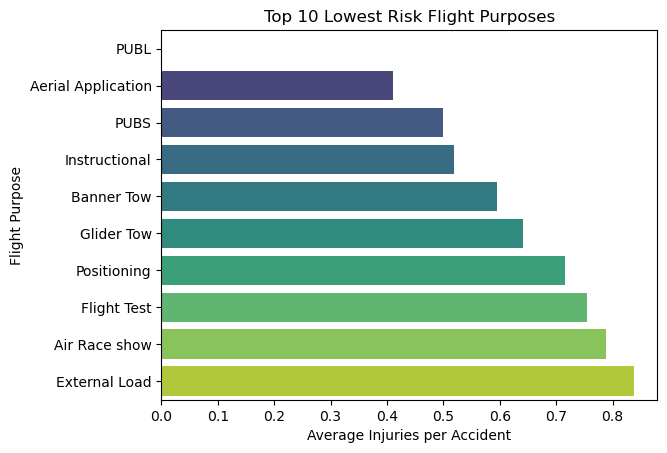

In [153]:
# Plotting the 10 flight purposes with the lowest average injuries per accident.

sns.barplot(data=flight_purpose_risk.head(10), y="Purpose.of.flight", x="Average_Injuries", hue="Purpose.of.flight", palette="viridis", legend=False)
plt.title("Top 10 Lowest Risk Flight Purposes")
plt.xlabel("Average Injuries per Accident")
plt.ylabel("Flight Purpose")
plt.show()

*Finding 1:* Aerial Application and Banner Towing are among the safest flight purposes.

## 3.2 Flight Phase
In this analysis we're grouping by 'Broad.phase.of.flight' to compute:
- Average injuries during each flight phase
- Total accident count per phase

In [164]:
phase_risk = (
    df.groupby("Broad.phase.of.flight")
    .agg(Average_Injuries=("Total.Injuries", "mean"), Total_Accidents=("Broad.phase.of.flight", "count"))
    .reset_index()
    .sort_values(by="Average_Injuries")
)

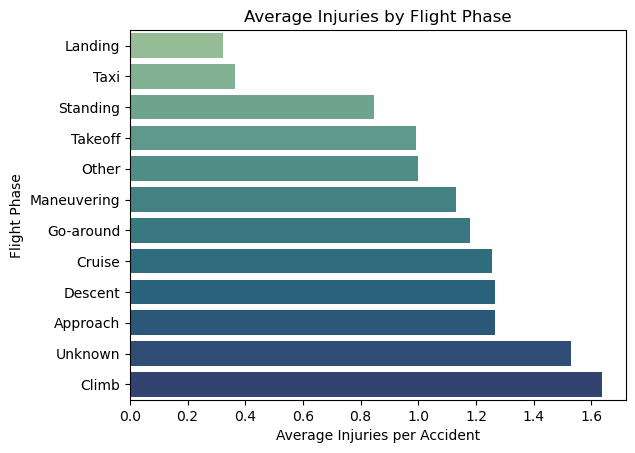

In [167]:
# Bar chart showing average injuries across flight phases.
# Finding: Maneuvering and Go-around phases have the lowest injury rates; Taxiing and Standing are most severe.
sns.barplot(data=phase_risk, y="Broad.phase.of.flight", x="Average_Injuries", hue="Broad.phase.of.flight", palette="crest", legend=False)
plt.title("Average Injuries by Flight Phase")
plt.xlabel("Average Injuries per Accident")
plt.ylabel("Flight Phase")
plt.show()

*Finding:* Maneuvering and Go-around phases have the lowest injury rates; Taxiing and Standing are most severe.